# WAVLET.PY

#### Python wavelet anaysis code based on the code in [IDL and MATLAB](http://paos.colorado.edu/research/wavelets/software.html) language written by Christopher Torrence and [PYTHON 2](http://paos.colorado.edu/research/wavelets/software.html) language written by Evgeniya Predybaylo.

The wavelet code for PYTHON written by Evgeniya Predybaylo only can use in PYTHON 2 and has some errors.
To avoid these errors and run also in PYTHON 3, we need the revised version of wavelet code.
Here, we provide the new PYTHON code which is slightly faster than Predybaylo's code and catch the erros.

### Developer
Author : Juhyeong Kang

Date  : Sep 2016

Email : jhkang@astro.snu.ac.kr

# Wavelet

Computes the wavelet transfor of the timeseries with sampling time dt.

By default, the Molet nonorthogonal wavlet function with k0=6 is used.
The wavelet basis is normalized to have total energy=1 at all sacles.

### Syntax

wave, period, scale, coi = wavelet(y,dt,dj=0.25,s0=False,j=False,mother='MORLET',param=False,pad=False)

signif = wave_signif(y,dt,scale,sigtest=0,mother='MORLET',param=False,lag1=0.0,siglvl=0.95,dof=-1,gws=False,confidence=False)

## Setting

In [1]:
matplotlib inline

In [2]:
import glob

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from fisspy.analysis.wavelet import wavelet, wave_signif

In [6]:
file=glob.glob('*.dat')

In [7]:
y=np.loadtxt(file[0])

In [8]:
var=np.var(y,ddof=1)

In [9]:
sst=(y-y.mean())/var**0.5

In [10]:
n=len(sst)
dt=0.25
time=np.arange(n)*dt+1871.
xlim=[int(np.round(time[0],-1)),int(np.round(time[-1],-1))]
dj=0.25
s0=2*dt
j1 = int(7/dj)
lag1 = 0.72
mother = 'PAUL'
pad =True

## Wavelet transform

In [11]:
wave, period, scale, coi = wavelet(sst,dt,dj,s0,j1,mother,pad=pad)

In [12]:
wave.shape

(29, 504)

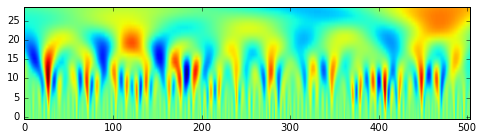

In [13]:
plt.figure(figsize=(8,2))
plt.imshow(wave.real,origin='lower',aspect='auto')

In [14]:
power=np.abs(wave)**2

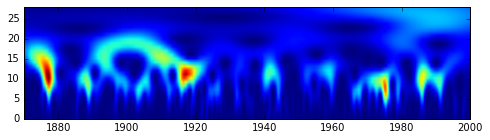

In [15]:
plt.figure(figsize=(8,2))
plt.imshow(power.real,origin='lower',aspect='auto',extent=[xlim[0],xlim[1],0,28])

## Significance

Significance levels (var=1 for the normalized sst)

In [16]:
signif = wave_signif(1.0,dt,scale,sigtest=0,mother=mother,lag1=lag1)

In [17]:
sig95=signif[:,np.newaxis]*np.ones(n)
sig95 = power / sig95

Global wavelet function and significance levels

In [18]:
gws=var*(power.sum(axis=1)/n)

In [19]:
dof = n - scale

In [20]:
gsig = wave_signif(var,dt,scale,sigtest=1,lag1=lag1,dof=dof,mother=mother)

Scale-average netween El Nino periods of 2-8 years

In [40]:
avg=(scale>=2)*(scale<=8)
cdelta = 0.776
scale_avg = scale[:,np.newaxis]*np.ones(n)
scale_avg = power/scale_avg
scale_avg = var*dj*dt/cdelta*scale_avg[avg,:].sum(axis=0)

In [22]:
savgsig = wave_signif(var,dt,scale,sigtest=2,lag1=lag1,dof=[2,7.9],mother=mother)

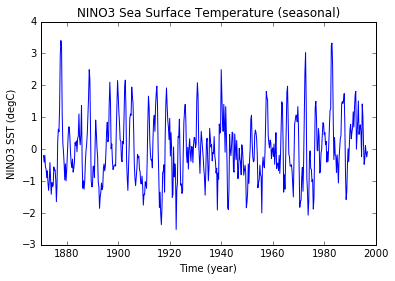

In [29]:
plt.plot(time,sst)
plt.xlim(xlim)
plt.xlabel('Time (year)')
plt.ylabel('NINO3 SST (degC)')
plt.title('NINO3 Sea Surface Temperature (seasonal)')

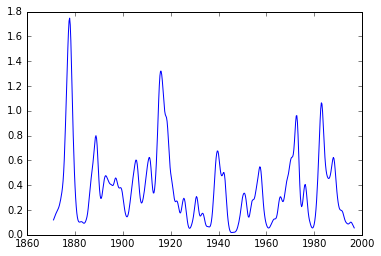

In [41]:
plt.plot(time,scale_avg)

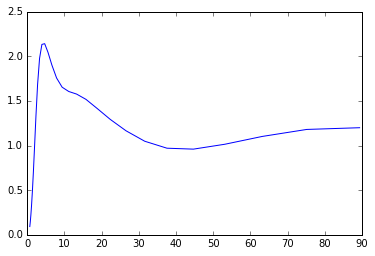

In [44]:
plt.plot(period,gws)

In [46]:
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]

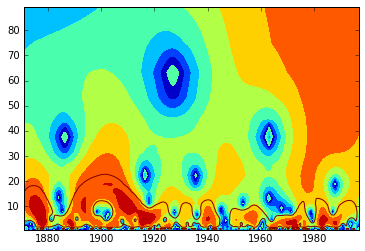

In [56]:
cs=plt.contourf(time, period[:,0], np.log2(power), len(levels))
im=plt.contourf(cs,levels=np.log2(levels))
plt.contour(time,period[:,0],sig95,[-99,1],color='k')